In [19]:
import numpy as np
import pandas as pd

import sys
print(sys.executable)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans  
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import vectorizer

/opt/anaconda3/envs/FinalProject/bin/python


In [20]:
class_names = ['Adult', 'Arts', 'Business', 'Computers', 'Games', 'Health', 'Home', 'Kids', 'News', 'Recreation',
               'Reference', 'Science', 'Shopping', 'Society', 'Sports']

train = pd.read_csv('./train_set_subsample.csv').fillna(' ')
test = pd.read_csv('./dev_set_subsample.csv').fillna(' ')

train_text = train['URL']
test_text = test['URL']
all_text = pd.concat([train_text, test_text])


word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)
test_word_features = word_vectorizer.transform(test_text)
word_matrix = word_vectorizer.fit_transform(train_text)

indices = np.argsort(word_vectorizer.idf_)[::-1]
word_features = word_vectorizer.get_feature_names()
top_n = 20
top_features = [word_features[i] for i in indices[:top_n]]
print(top_features)

['zw', 'nm0065130', 'nm0213983', 'nm0238898', 'nm0286163', 'nm0671837', 'nm0763639', 'nm0771121', 'nm0862937', 'nm102596', 'nmfh', 'nmhrk', 'nmk', 'nmmetallics', 'brentthurman', 'nmu', 'nnu', 'no1', 'no297', 'brendans']


Text(0, 0.5, 'Total Number Of Individual Category for Testing')

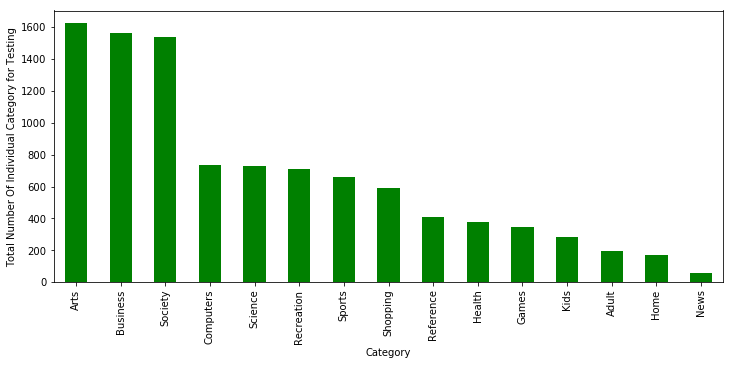

In [21]:
train[class_names].idxmax(axis=1).value_counts().plot(figsize=(12,5),kind='bar',color='green')
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category for Testing')

In [22]:
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE

# num_clusters = 10
# num_seeds = 10
# max_iterations = 300
# labels_color_map = {
#     0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
#     5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
# }
# pca_num_components = 2
# tsne_num_components = 2


# # create k-means model with custom config
# # clustering_model = KMeans(
# #     n_clusters=num_clusters,
# #     max_iter=max_iterations,
# #     precompute_distances="auto",
# #     n_jobs=-1
# # )

# clustering_model = KMeans(n_clusters=15) 

# labels = clustering_model.fit_predict(word_matrix)
# # print labels

# X = word_matrix.todense()

# reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# # print reduced_data

In [23]:
# fig, ax = plt.subplots()
# for index, instance in enumerate(reduced_data):
#     # print instance, index, labels[index]
#     pca_comp_1, pca_comp_2 = reduced_data[index]
#     color = labels_color_map[labels[index]]
#     ax.scatter(pca_comp_1, pca_comp_2, c=color)
# plt.show()

In [24]:
# # t-SNE plot
# embeddings = TSNE(n_components=tsne_num_components)
# Y = embeddings.fit_transform(X)
# plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
# plt.show()

In [25]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=10000)
char_vectorizer.fit(all_text)

train_char_features = char_vectorizer.transform(train_text)
test_char_features = char_vectorizer.transform(test_text)

indices = np.argsort(char_vectorizer.idf_)[::-1]
char_features = char_vectorizer.get_feature_names()
top_n = 20
top_features = [char_features[i] for i in indices[:top_n]]
print(top_features)
features = char_features + word_features

['00000', 'ccel', 'mp;sp', 'p;sp', ';sp', 'amp;sp', '-free-', '-free', 'soups/', '-porn', '-pics', 'amg', 'soups', 'sex-', '/soups', '-fre', 'rums', '0000', 'cheats', 'fem']


In [26]:
train_features = hstack([train_char_features, train_word_features])
test_features = hstack([test_char_features, test_word_features])

scores = []
submission = pd.DataFrame.from_dict({'Number': test['Number']})

In [27]:
classifier = LogisticRegression(C=0.1, solver='sag')
for class_name in class_names:
    train_target = train[class_name]

    cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

    classifier.fit(train_features, train_target)
    submission[class_name] = classifier.predict_proba(test_features)[:, 1]

print('Total CV score is {}'.format(np.mean(scores)))

submission.to_csv('submission.csv', index=False)

CV score for class Adult is 0.7811439424337348
CV score for class Arts is 0.7288118813425694
CV score for class Business is 0.785023900225443
CV score for class Computers is 0.7247073611231478
CV score for class Games is 0.7765387342396127
CV score for class Health is 0.6681499224300528
CV score for class Home is 0.7215953719586254
CV score for class Kids is 0.7639544576233038
CV score for class News is 0.7193011572382978
CV score for class Recreation is 0.668370653738005
CV score for class Reference is 0.8084431977346062
CV score for class Science is 0.7704730783178689
CV score for class Shopping is 0.7892314629609515
CV score for class Society is 0.732209362523808
CV score for class Sports is 0.7638240280621839
Total CV score is 0.7467852341301473


Accuracy on test: 0.4082


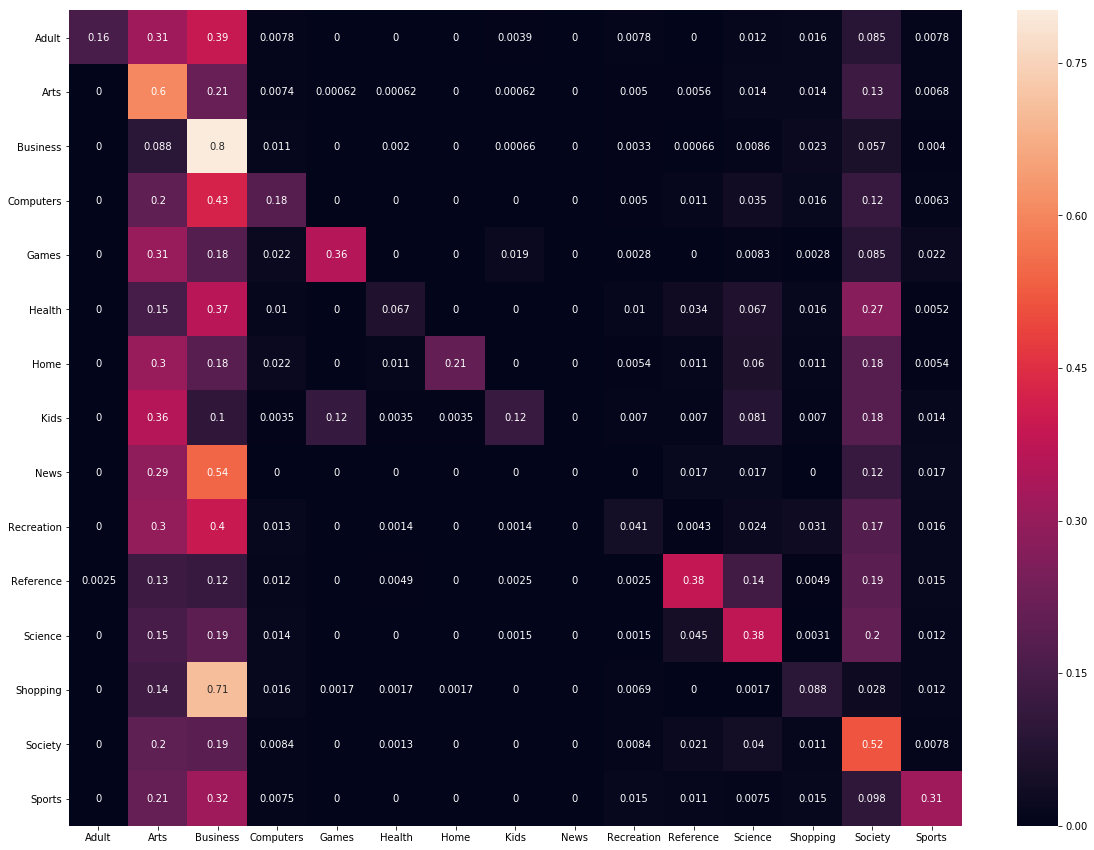

In [28]:
col = train.loc[:,'Adult':].to_numpy(int);
train_y = np.where(col==1)[1]
col = test.loc[:,'Adult':].to_numpy(int);
test_y = np.where(col==1)[1]
# Multi class solver
multi_classifier = LogisticRegression(C=0.5, random_state=1, solver='lbfgs',
                                      multi_class='multinomial', max_iter=300).fit(train_features, train_y)
test_pred_multi = np.argmax(multi_classifier.predict_proba(test_features.tocsr()), axis=1)
correct = test_pred_multi == test_y
test_accurate = np.sum(correct)/test_pred_multi.shape[0]
print('Accuracy on test: ' + str(test_accurate))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
array = confusion_matrix(test_y, test_pred_multi)
cm=np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

In [29]:
# from sklearn.metrics import precision_recall_fscore_support
# from sklearn.metrics import confusion_matrix
# X_test = test.loc[:, 'URL']
# col = test.loc[:,'Adult':].to_numpy(int)
# test_y = np.where(col==1)[1]
# y_test = pd.Series(np.array(class_names)[test_y].astype(object))
# #grid_mean_scores = [result.mean_validation_score for result in gs_clf.grid_scores_]
# #print(grid_mean_scores)
# y_pred=gs_clf.predict(X_test)
# precision_recall_fscore_support(y_test, y_pred, average='weighted')
# y_pred=gs_clf.predict(X_test)
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train = train.loc[:, 'URL']
col = train.loc[:,'Adult':].to_numpy(int)
train_y = np.where(col==1)[1]
y_train = pd.Series(np.array(class_names)[train_y].astype(object))
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)

In [31]:
y_train

0        Computers
1          Society
2            Games
3         Business
4          Society
5           Sports
6             Arts
7             Arts
8          Society
9           Sports
10         Society
11        Business
12         Society
13        Business
14           Adult
15      Recreation
16        Business
17        Business
18          Health
19        Shopping
20            Arts
21        Shopping
22           Games
23        Shopping
24         Science
25            Kids
26            Arts
27        Business
28            Arts
29        Business
           ...    
9970      Business
9971     Reference
9972       Society
9973       Society
9974       Society
9975     Reference
9976     Reference
9977         Games
9978         Games
9979    Recreation
9980          Arts
9981      Shopping
9982     Computers
9983          Home
9984       Society
9985       Society
9986      Business
9987      Business
9988    Recreation
9989       Science
9990          Kids
9991        

In [32]:
# from sklearn.model_selection import RandomizedSearchCV
# n_iter_search = 5
# parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
# gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search)
# gs_clf = gs_clf.fit(X_train, y_train)

In [33]:
# from sklearn.metrics import precision_recall_fscore_support
# from sklearn.metrics import confusion_matrix
# X_test = test.loc[:, 'URL']
# col = test.loc[:,'Adult':].to_numpy(int)
# test_y = np.where(col==1)[1]
# y_test = pd.Series(np.array(class_names)[test_y].astype(object))
# #grid_mean_scores = [result.mean_validation_score for result in gs_clf.grid_scores_]
# #print(grid_mean_scores)
# y_pred=gs_clf.predict(X_test)
# precision_recall_fscore_support(y_test, y_pred, average='weighted')
# y_pred=gs_clf.predict(X_test)
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

In [34]:
col = train.loc[:,'Adult':].to_numpy(int);
train_y = np.where(col==1)[1]
col = test.loc[:,'Adult':].to_numpy(int);
test_y = np.where(col==1)[1]
test_pred = np.argmax(submission.loc[:, 'Adult':].to_numpy()[:, :], axis=1)
correct = test_pred == test_y
test_accurate = np.sum(correct)/test_y.shape[0]
print('Accuracy on test: ' + str(test_accurate))

Accuracy on test: 0.347


In [35]:
# def cluster_accuracy(cluster_size):
#     clustering = KMeans(n_clusters=cluster_size) 
#     clustering.fit(test_features.tocsr())
#     cluster_accuracy = np.sum(train.iloc[:, 2+clustering.predict(test_features.tocsc())[0]]) / train.shape[0]
#     print('Accuracy: ' + str(cluster_accuracy))
#     return clustering
# cluster_ten = cluster_accuracy(5)
# cluster_fifteen = cluster_accuracy(3)

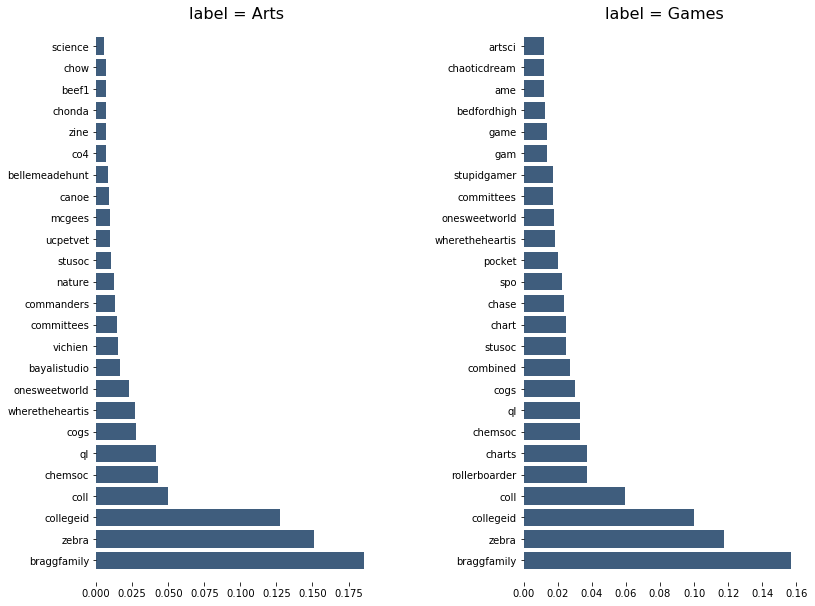

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df


def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)


def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs


def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
#         ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(class_names[df.label]), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()
    
dfs = top_feats_by_class(train_features.tocsr(), train_y, features)
plot_tfidf_classfeats_h((dfs[1], dfs[4]))

In [49]:
from vectorizer import debug
print('Look for the line ending with .json below. You can attach to that python process in PyCharm.\n\n')
%load_ext autoreload
%autoreload 2
%connect_info
from vectorizer import debug
debug(('Debugging'))

Look for the line ending with .json below. You can attach to that python process in PyCharm.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{
  "shell_port": 51031,
  "iopub_port": 34309,
  "stdin_port": 52197,
  "control_port": 50467,
  "hb_port": 54035,
  "ip": "127.0.0.1",
  "key": "697f71bd-fc73cbb010cfcdc8d55a6092",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-c1d7e215-e640-4179-ad62-b931cd3cc699.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
debugging
